In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import seaborn as sns
import geopandas as gpd
import numpy as np

# 設定字體
#! gdown -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set(font=['Taipei Sans TC Beta'])

In [43]:
file_path = 'data/全國人口資料庫統計地圖.csv'
population_data = pd.read_csv(file_path)

population_data['人口密度'] = population_data['人口密度'].str.replace(',', '').astype(float)

population_data_filtered = population_data[~population_data['區域別'].str.contains('臺北市')]

population_data_sorted = population_data_filtered.sort_values(by='人口密度', ascending=True)

population_data_sorted['人口密度'] = range(len(population_data_sorted), 0, -1)

population_data_sorted.head(13)


,區域別,人口密度
11,北投區,12
10,士林區,11
8,南港區,10
7,文山區,9
9,內湖區,8
3,中山區,7
1,信義區,6
4,中正區,5
6,萬華區,4
0,松山區,3


In [44]:
elderly_population_file = 'data/台北_行政區老年人口.csv'
elderly_population_data = pd.read_csv(elderly_population_file)
elderly_population_sorted = elderly_population_data.sort_values(by='65歲以上總和', ascending=False)

elderly_population_sorted['老年人口數'] = range(len(elderly_population_sorted), 0, -1)

merged_data = population_data_sorted.merge(
    elderly_population_sorted[['區域別', '老年人口數']],
    on='區域別',
    how='left'
)

merged_data.head(13)


,區域別,人口密度,老年人口數
0,北投區,12,9
1,士林區,11,11
2,南港區,10,1
3,文山區,9,10
4,內湖區,8,6
5,中山區,7,8
6,信義區,6,7
7,中正區,5,3
8,萬華區,4,4
9,松山區,3,5


In [45]:
welfare_institutions_data=pd.read_csv('data/臺北市老人福利機構名冊.csv')

welfare_institutions_count = welfare_institutions_data['區域別'].value_counts()

welfare_institutions_count_df = welfare_institutions_count.reset_index()
welfare_institutions_count_df.columns = ['區域別', '福利機構']

welfare_institutions_count_df = welfare_institutions_count_df.sort_values(by='福利機構', ascending=False)
welfare_institutions_count_df['福利機構'] = range(len(welfare_institutions_count_df), 0, -1)

merged_data_final = merged_data.merge(
    welfare_institutions_count_df[['區域別', '福利機構']],
    on='區域別',
    how='left'
)

merged_data_final.head(13)


,區域別,人口密度,老年人口數,福利機構
0,北投區,12,9,12
1,士林區,11,11,10
2,南港區,10,1,1
3,文山區,9,10,11
4,內湖區,8,6,5
5,中山區,7,8,8
6,信義區,6,7,2
7,中正區,5,3,4
8,萬華區,4,4,7
9,松山區,3,5,3


In [46]:
hospital_data=pd.read_csv('data/臺北市衛生福利部評鑑合格之醫院名單.csv',encoding='big5')

hospital_count = hospital_data['區域別'].value_counts()

hospital_count_df = hospital_count.reset_index()
hospital_count_df.columns = ['區域別', '合格醫院']

hospital_count_df = hospital_count_df.sort_values(by='合格醫院', ascending=False)
hospital_count_df['合格醫院'] = range(len(hospital_count_df), 0, -1)

merged_data_final = merged_data_final.merge(
    hospital_count_df[['區域別', '合格醫院']],
    on='區域別',
    how='left'
)

merged_data_final.head(13)


,區域別,人口密度,老年人口數,福利機構,合格醫院
0,北投區,12,9,12,10
1,士林區,11,11,10,9
2,南港區,10,1,1,6
3,文山區,9,10,11,1
4,內湖區,8,6,5,5
5,中山區,7,8,8,3
6,信義區,6,7,2,2
7,中正區,5,3,4,8
8,萬華區,4,4,7,4
9,松山區,3,5,3,12


In [47]:
living_file_path = 'data/北市_商圈綠地.csv'
living_data = pd.read_csv(living_file_path)

grouped_data = living_data.groupby(['區', 'type']).size().reset_index(name='counts')

parks_data = grouped_data[grouped_data['type'] == '公園'].sort_values(by='counts', ascending=False)
parks_data['公園數量'] = range(len(parks_data), 0, -1)

merged_data_with_parks = merged_data_final.merge(
    parks_data[['區', '公園數量']],
    left_on='區域別',
    right_on='區',
    how='left'
).drop(columns=['區'])

merged_data_with_parks.head(13)



,區域別,人口密度,老年人口數,福利機構,合格醫院,公園數量
0,北投區,12,9,12,10,12
1,士林區,11,11,10,9,11
2,南港區,10,1,1,6,5
3,文山區,9,10,11,1,8
4,內湖區,8,6,5,5,9
5,中山區,7,8,8,3,10
6,信義區,6,7,2,2,7
7,中正區,5,3,4,8,1
8,萬華區,4,4,7,4,3
9,松山區,3,5,3,12,4


In [48]:
grouped_data = living_data.groupby(['區', 'type']).size().reset_index(name='counts')

busineses_data = grouped_data[grouped_data['type'] == '商圈'].sort_values(by='counts', ascending=False)
busineses_data['商圈數量'] = range(len(busineses_data), 0, -1)

merged_data_with_busineses = merged_data_with_parks.merge(
    busineses_data[['區', '商圈數量']],
    left_on='區域別',
    right_on='區',
    how='left'
).drop(columns=['區'])

merged_data_with_busineses.head(13)

,區域別,人口密度,老年人口數,福利機構,合格醫院,公園數量,商圈數量
0,北投區,12,9,12,10,12,4
1,士林區,11,11,10,9,11,5
2,南港區,10,1,1,6,5,1
3,文山區,9,10,11,1,8,3
4,內湖區,8,6,5,5,9,6
5,中山區,7,8,8,3,10,12
6,信義區,6,7,2,2,7,7
7,中正區,5,3,4,8,1,11
8,萬華區,4,4,7,4,3,8
9,松山區,3,5,3,12,4,2


In [49]:
merged_data_with_busineses['交通'] = 8

merged_data_with_busineses.head(13)

,區域別,人口密度,老年人口數,福利機構,合格醫院,公園數量,商圈數量,交通
0,北投區,12,9,12,10,12,4,8
1,士林區,11,11,10,9,11,5,8
2,南港區,10,1,1,6,5,1,8
3,文山區,9,10,11,1,8,3,8
4,內湖區,8,6,5,5,9,6,8
5,中山區,7,8,8,3,10,12,8
6,信義區,6,7,2,2,7,7,8
7,中正區,5,3,4,8,1,11,8
8,萬華區,4,4,7,4,3,8,8
9,松山區,3,5,3,12,4,2,8


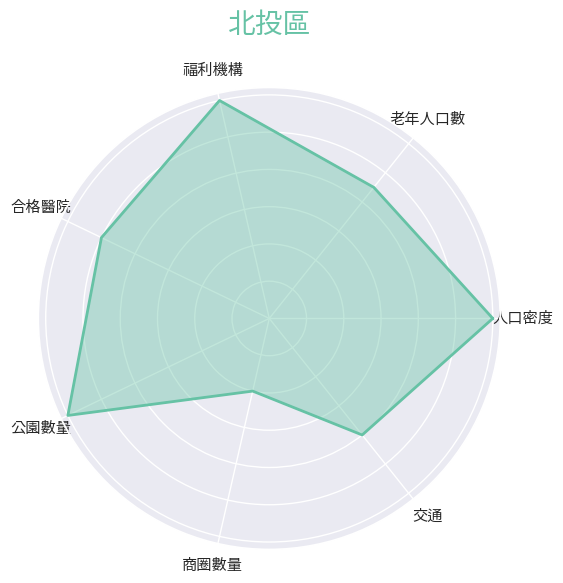

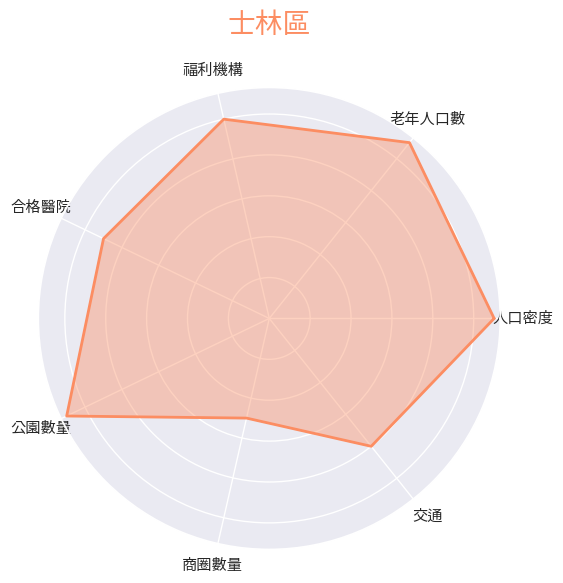

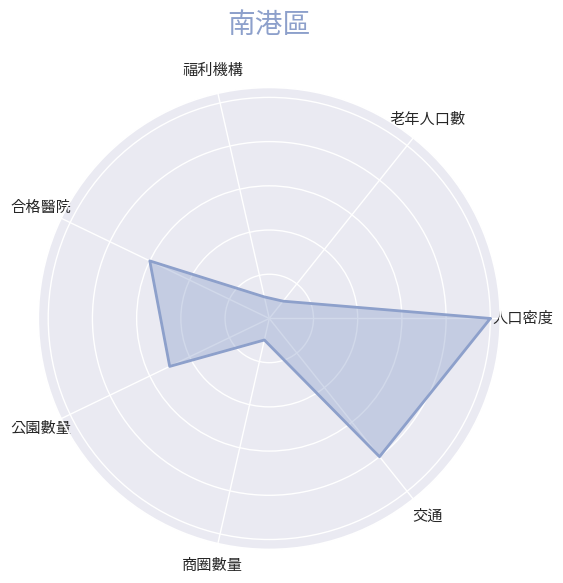

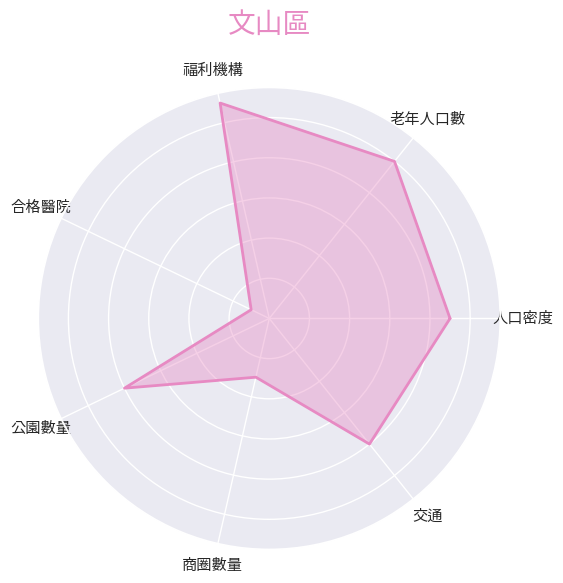

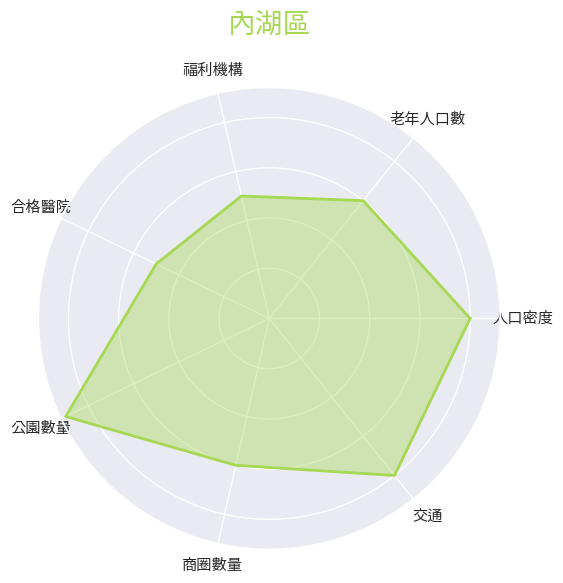

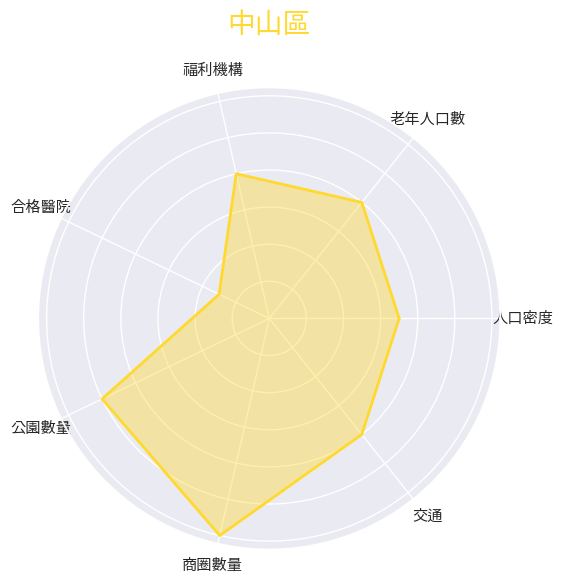

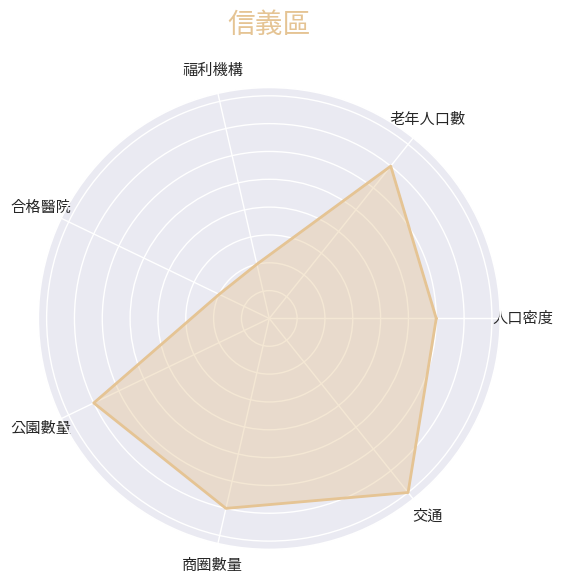

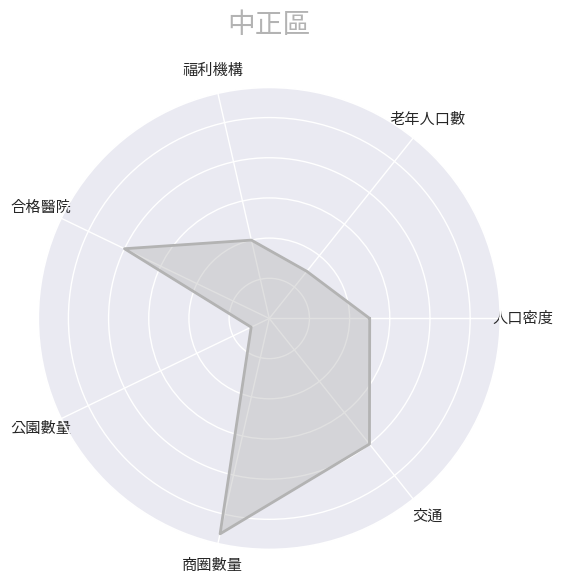

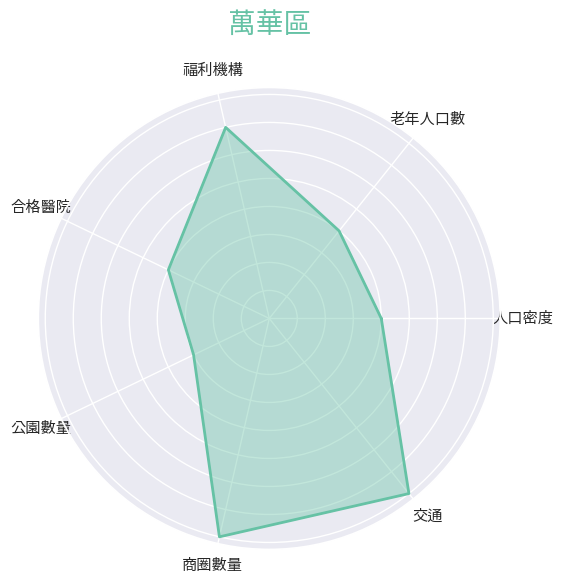

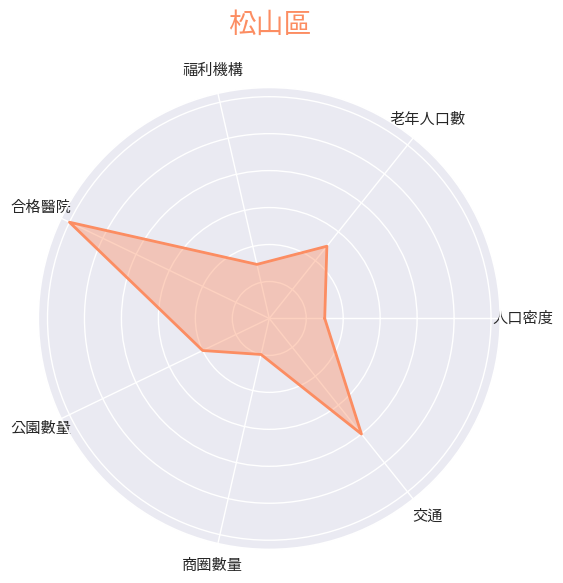

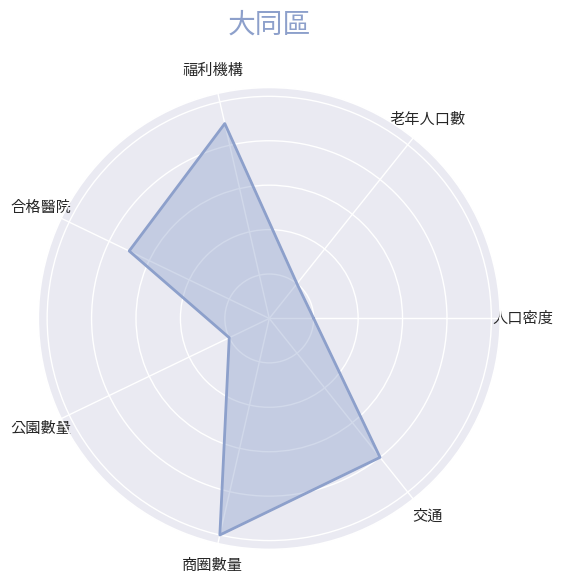

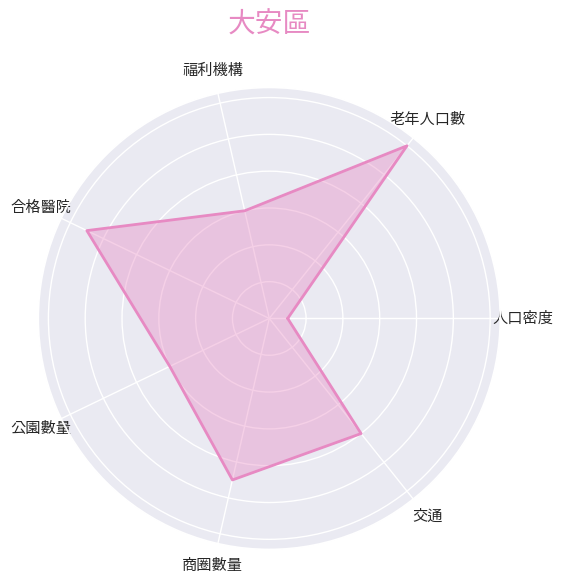

In [63]:
data_for_radar = merged_data_with_busineses

def create_radar_chart_corrected_v2(district_data, colors, title):
    labels = np.array(['人口密度', '老年人口數', '福利機構', '合格醫院', '公園數量', '商圈數量', '交通'])
    stats = district_data[labels].values

    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    stats = np.concatenate((stats, [stats[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, stats, color=colors, alpha=0.4)
    ax.plot(angles, stats, color=colors, linewidth=2)  # Draw the outline of our data
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    plt.title(title, size=20, color=colors, y=1.1)
    
palette = sns.color_palette("Set2", n_colors=12)
# Create radar charts for each district
for i, district in enumerate(data_for_radar['區域別']):
    district_data = data_for_radar[data_for_radar['區域別'] == district].iloc[0]
    create_radar_chart_corrected_v2(district_data, palette[i], district)

plt.show()
